In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import pygame
from sklearn.metrics import f1_score
from sklearn.metrics import silhouette_samples, silhouette_score

In [136]:
data = pd.read_csv('C://Shaurya Games//New folder//fashion-mnist_train.csv')

data = np.array(data)
m, n = data.shape

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
print(Y_train.dtype)
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

int64


In [137]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

In [138]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def der_sigmoid(x):
  return sigmoid(x) * (1- sigmoid(x))

In [139]:
def softmax(A):
    
    expA = np.exp(A)
    return expA / sum(np.exp(A))

In [140]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [141]:
def init_params():
    W1 = np.random.rand(64, 784) - 0.5
    b1 = np.random.rand(64, 1) - 0.5
    W2 = np.random.rand(10, 64) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
        
    return W1, b1, W2, b2, W3, b3
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3
    
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3
    
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
        
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3  
    return W1, b1, W2, b2, W3, b3
    
def get_predictions(A):
    return np.argmax(A, 0)

In [142]:
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [143]:
def compute_loss(y_true, y_pred):
    #y_pred= one_hot(y_pred)
    loss = -np.sum(y_true * np.log(y_pred + 1e-10)) / len(y_true)
    return loss

In [144]:
def gradient_descent(X, Y, alpha, iterations):
    loss=[]
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
            loss.append(compute_loss(one_hot(Y), A3))
            print(predictions)
    return W1, b1, W2, b2, W3, b3, loss

In [145]:
print(Y_train.dtype)
W1, b1, W2, b2, W3, b3, loss = gradient_descent(X_train, Y_train, 0.1, 300)

int64
Iteration:  0
0.07206779661016949
[6 3 3 ... 3 3 9]
Iteration:  10
0.1854237288135593
[1 1 7 ... 9 6 9]
Iteration:  20
0.28440677966101696
[1 1 7 ... 9 9 5]
Iteration:  30
0.34527118644067795
[7 1 6 ... 5 5 7]
Iteration:  40
0.46623728813559323
[7 6 6 ... 5 8 7]
Iteration:  50
0.4960677966101695
[7 8 6 ... 8 8 7]
Iteration:  60
0.5480169491525424
[7 2 6 ... 8 8 7]
Iteration:  70
0.6125593220338983
[7 2 6 ... 8 8 7]
Iteration:  80
0.6325254237288136
[7 2 6 ... 8 8 7]
Iteration:  90
0.6138474576271187
[7 2 6 ... 8 8 7]
Iteration:  100
0.6433050847457628
[7 2 6 ... 8 8 7]
Iteration:  110
0.6542203389830509
[7 2 6 ... 8 8 7]
Iteration:  120
0.6622372881355932
[5 2 6 ... 8 8 7]
Iteration:  130
0.6691694915254237
[5 2 6 ... 8 8 7]
Iteration:  140
0.6765593220338983
[5 2 6 ... 8 8 7]
Iteration:  150
0.6826101694915254
[5 2 6 ... 8 8 7]
Iteration:  160
0.6876949152542373
[5 2 6 ... 8 8 7]
Iteration:  170
0.6922203389830508
[5 2 6 ... 8 8 7]
Iteration:  180
0.6964406779661017
[5 2 0 ... 8

[23760.2408700561, 12393.003736612614, 11304.20097446163, 10517.384631417368, 9314.52097894243, 8319.880806082136, 7133.016044495972, 6178.357930694485, 5764.476576467017, 6227.728831398856, 5528.395021966624, 5349.643816047171, 5204.991202744742, 5074.8150399359665, 4954.191362092114, 4853.184384230103, 4761.729359431883, 4681.431701656827, 4604.100808016947, 4532.116822476955, 4467.027112695476, 4406.739376338584, 4352.438323249446, 4305.559760257348, 4256.047387713236, 4212.488690600857, 4173.346358860606, 4138.367625893797, 4104.622887503081, 4073.8168530185985]


0.721

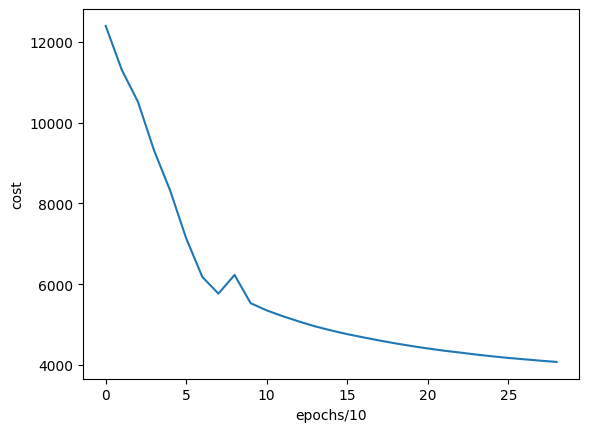

In [146]:
print(loss)
loss=loss[1:]
plt.plot(range(len(loss)),loss)
plt.xlabel('epochs/10')
plt.ylabel('cost')
z1,a1,z2,a2,z3,a3=forward_prop(W1, b1, W2, b2, W3, b3, X_dev)
predictions=get_predictions(a3)
get_accuracy(predictions, Y_dev)

In [147]:
df3 = pd.read_csv('C://Shaurya Games//New folder//fashion-mnist_test.csv')

df3 = np.array(df3)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

df3 = df3.T
Y_test = df3[0]
X_test = df3[1:n]
print(X_test)
X_test = X_test / 255.
_,m_train = X_test.shape

z1,a1,z2,a2,z3,a3=forward_prop(W1, b1, W2, b2, W3, b3, X_test)
predictions=get_predictions(a3)
get_accuracy(predictions, Y_test)
print(f1_score(predictions, Y_test, average='macro'))
print(f1_score(predictions, Y_test, average='micro'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 3 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
0.7277841124348101
0.7296
